In [109]:
#!pip install palmerpenguins

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

# bill_depth_mm prediction

In [110]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from plotnine import *
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [111]:
penguins = load_penguins()
penguins = penguins.dropna()
X = penguins.drop('bill_length_mm', axis = 1)
y = penguins['bill_length_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_test

,species,island,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
24,Adelie,Biscoe,17.2,180.0,3800.0,male,2007
161,Gentoo,Biscoe,15.4,215.0,5150.0,male,2007
319,Chinstrap,Dream,17.0,196.0,3500.0,female,2008
153,Gentoo,Biscoe,16.3,230.0,5700.0,male,2007
12,Adelie,Torgersen,17.6,182.0,3200.0,female,2007
...,...,...,...,...,...,...,...
250,Gentoo,Biscoe,14.4,203.0,4625.0,female,2009
154,Gentoo,Biscoe,14.1,210.0,4450.0,female,2007
231,Gentoo,Biscoe,16.4,223.0,5950.0,male,2008
259,Gentoo,Biscoe,15.8,219.0,5500.0,male,2009


In [112]:
# Code Here
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

my_pipeline = Pipeline(
    [('dummify', enc), ('ols', lr)]
)

In [113]:
#enc.fit_transform(penguins[['species']])

In [114]:
# Showing how to one-hot-encode  multiple columns in one go
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_specied", enc, ["species"]),
    ("dummify_island", enc, ["island"]),
    ("dummify_sex", enc, ["sex"])],
)
#>>> pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])


my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]
)

In [115]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
fitted_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_specied',
                                                  OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_island',
                                                  OneHotEncoder(), ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [116]:
# why we create these pipelines, is because everything is there already.
y_preds = fitted_pipeline.predict(X_test)
print(y_preds)

[41.078125 49.390625 46.671875 49.390625 37.078125 46.671875 49.390625
 46.671875 37.078125 45.453125 36.34375  49.390625 41.03125  40.296875
 41.03125  45.453125 46.671875 36.34375  40.296875 40.296875 36.34375
 37.125    41.03125  45.453125 49.390625 49.390625 37.125    49.390625
 37.078125 41.078125 45.453125 40.296875 50.625    36.34375  49.390625
 50.625    41.078125 41.03125  36.34375  36.34375  49.390625 41.078125
 46.671875 37.125    49.390625 37.125    46.671875 41.03125  50.625
 36.34375  46.671875 46.671875 50.625    49.390625 50.625    50.625
 41.03125  49.390625 41.03125  49.390625 49.390625 46.671875 49.390625
 49.390625 37.078125 36.34375  36.34375  40.296875 36.34375  46.671875
 45.453125 46.671875 46.671875 45.453125 41.03125  41.078125 41.078125
 37.078125 49.390625 45.453125 45.453125 49.390625 49.390625 50.625   ]


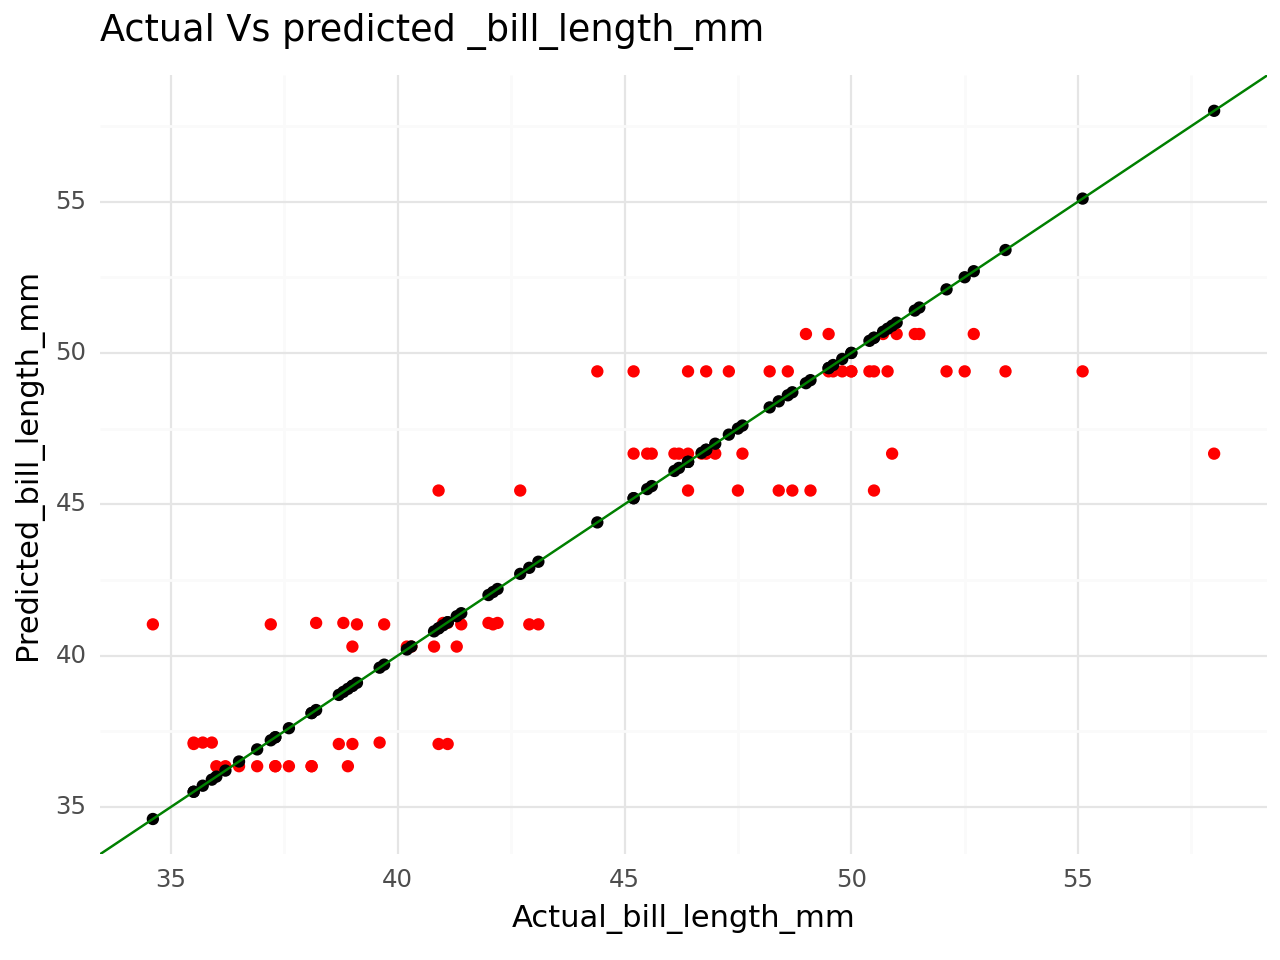

<Figure Size: (640 x 480)>

In [117]:
#plot creation
(ggplot(aes(x = "y_test", color="black"))
+ geom_point(aes(y='y_preds'), color="red")
+ geom_point(aes(y='y_test'), color="black")
+ geom_abline(intercept=0, slope=1, color="green")
+ theme_minimal()
+ labs(x='Actual_bill_length_mm', y='Predicted_bill_length_mm', title='Actual Vs predicted _bill_length_mm')
)

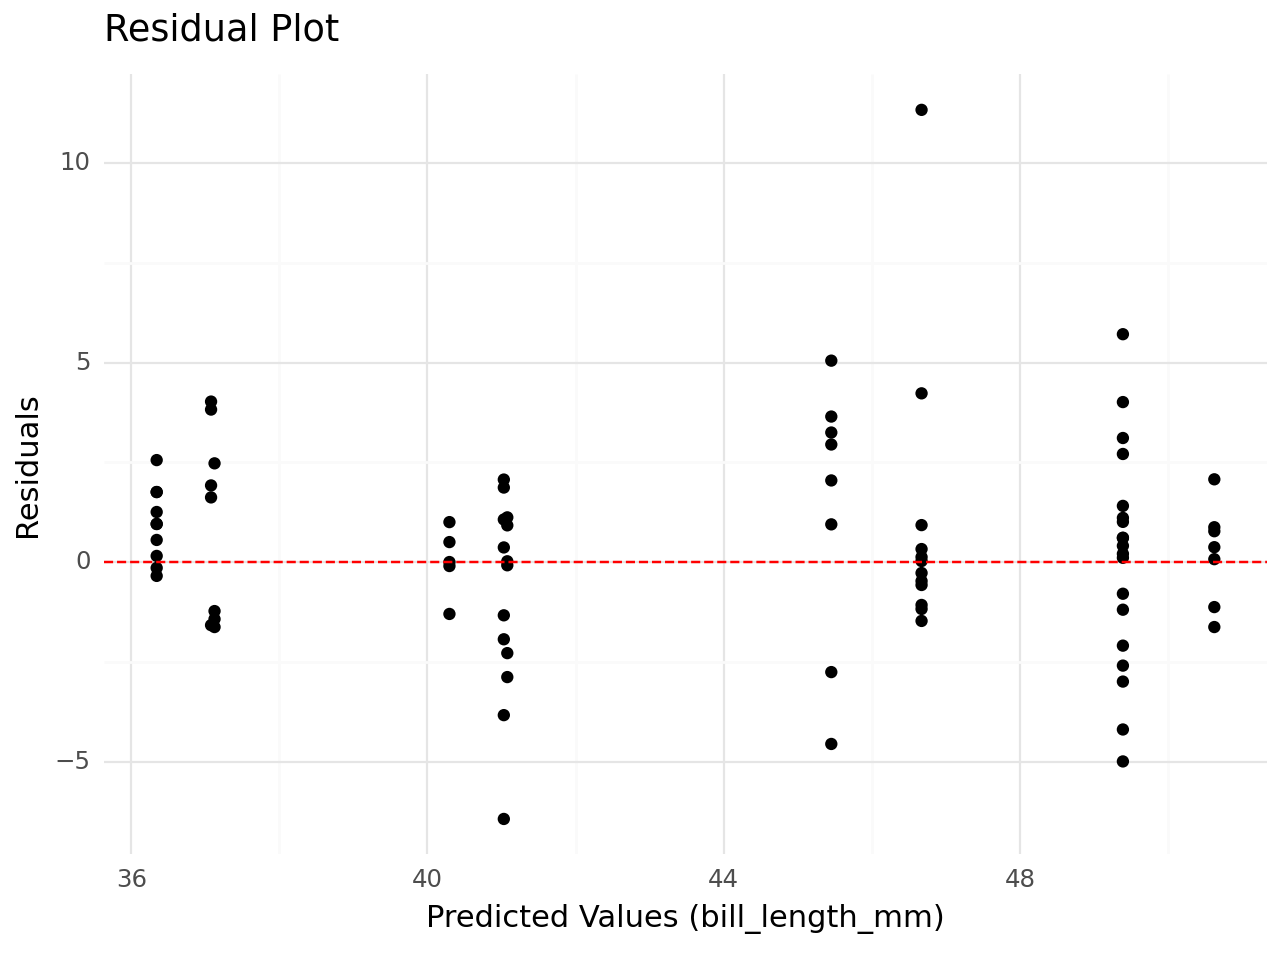

<Figure Size: (640 x 480)>

In [118]:
# Calculate residuals
residuals = y_test - y_preds

# Create a DataFrame with residuals
residual_data = pd.DataFrame({'Predicted Values (bill_length_mm)': y_preds, 'Residuals': residuals})

# Create the residual plot using ggplot
(ggplot(residual_data, aes(x="Predicted Values (bill_length_mm)", y="Residuals"))
+ geom_point()
+ geom_hline(yintercept=0, linetype="dashed", color="red")
+ labs(x="Predicted Values (bill_length_mm)", y="Residuals")
+ theme_minimal()
+ ggtitle("Residual Plot")
)


# `bill_length_mm` to predict `bill_depth_mm`

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [119]:
# Creating target and predictor variables
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

# creating the training and the test sets with a test size of .25, which is actually default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


## Simple linear regression model

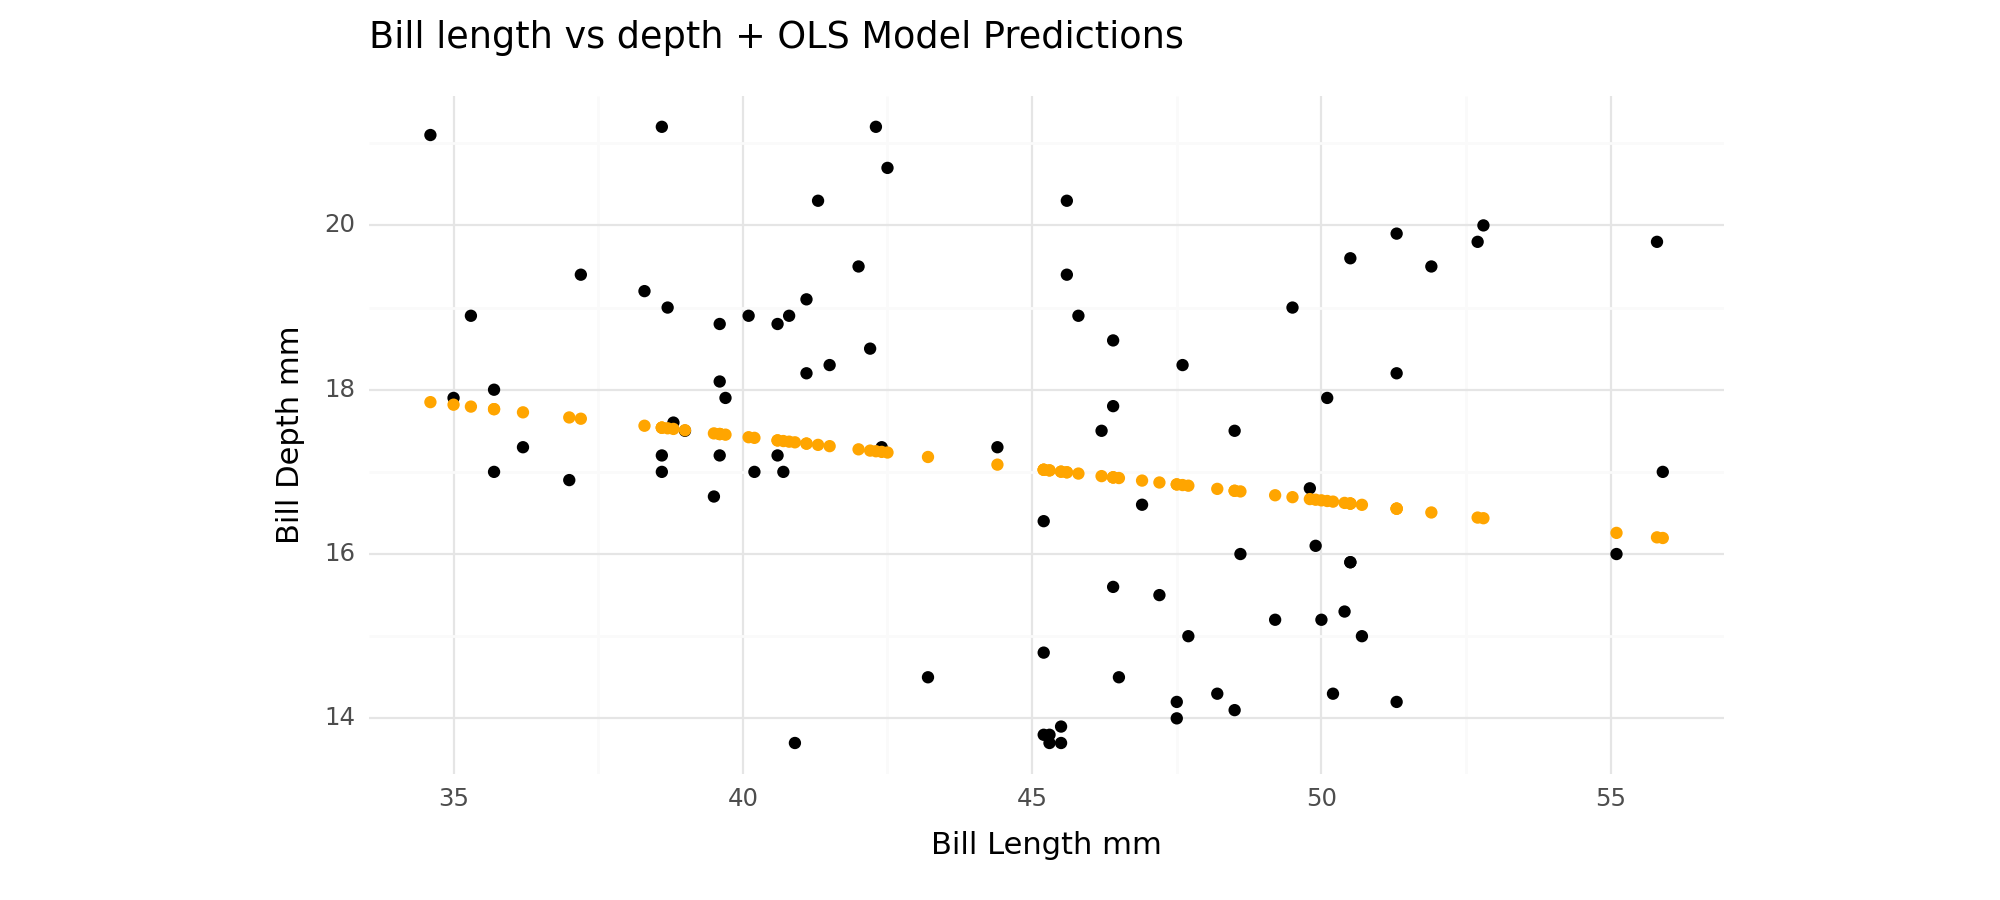

<Figure Size: (1000 x 450)>

In [120]:
#Simple Linear Regression

#renaming processess
lr = LinearRegression()

#fitting the model with the training sets
lr_fit = lr.fit(X_train, y_train)

#making predictions on the test set X_test with the model that was fitted with the training data
ols_lr = lr_fit.predict(X_test)

#showing the predictions the model did for the test set
#print(ols_lr)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'ols_lr': ols_lr})

# Plotting
(ggplot(test_data, aes(x="X_test"))
+ geom_point(test_data, aes(y='y_test'), color="black")
+ geom_point(test_data, aes(y='ols_lr'), color="orange")
+ theme_minimal()
+ theme(aspect_ratio=.5, figure_size=(10, 4.5))
+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + OLS Model Predictions')
)

## Quadratic (degree 2 polynomial) model

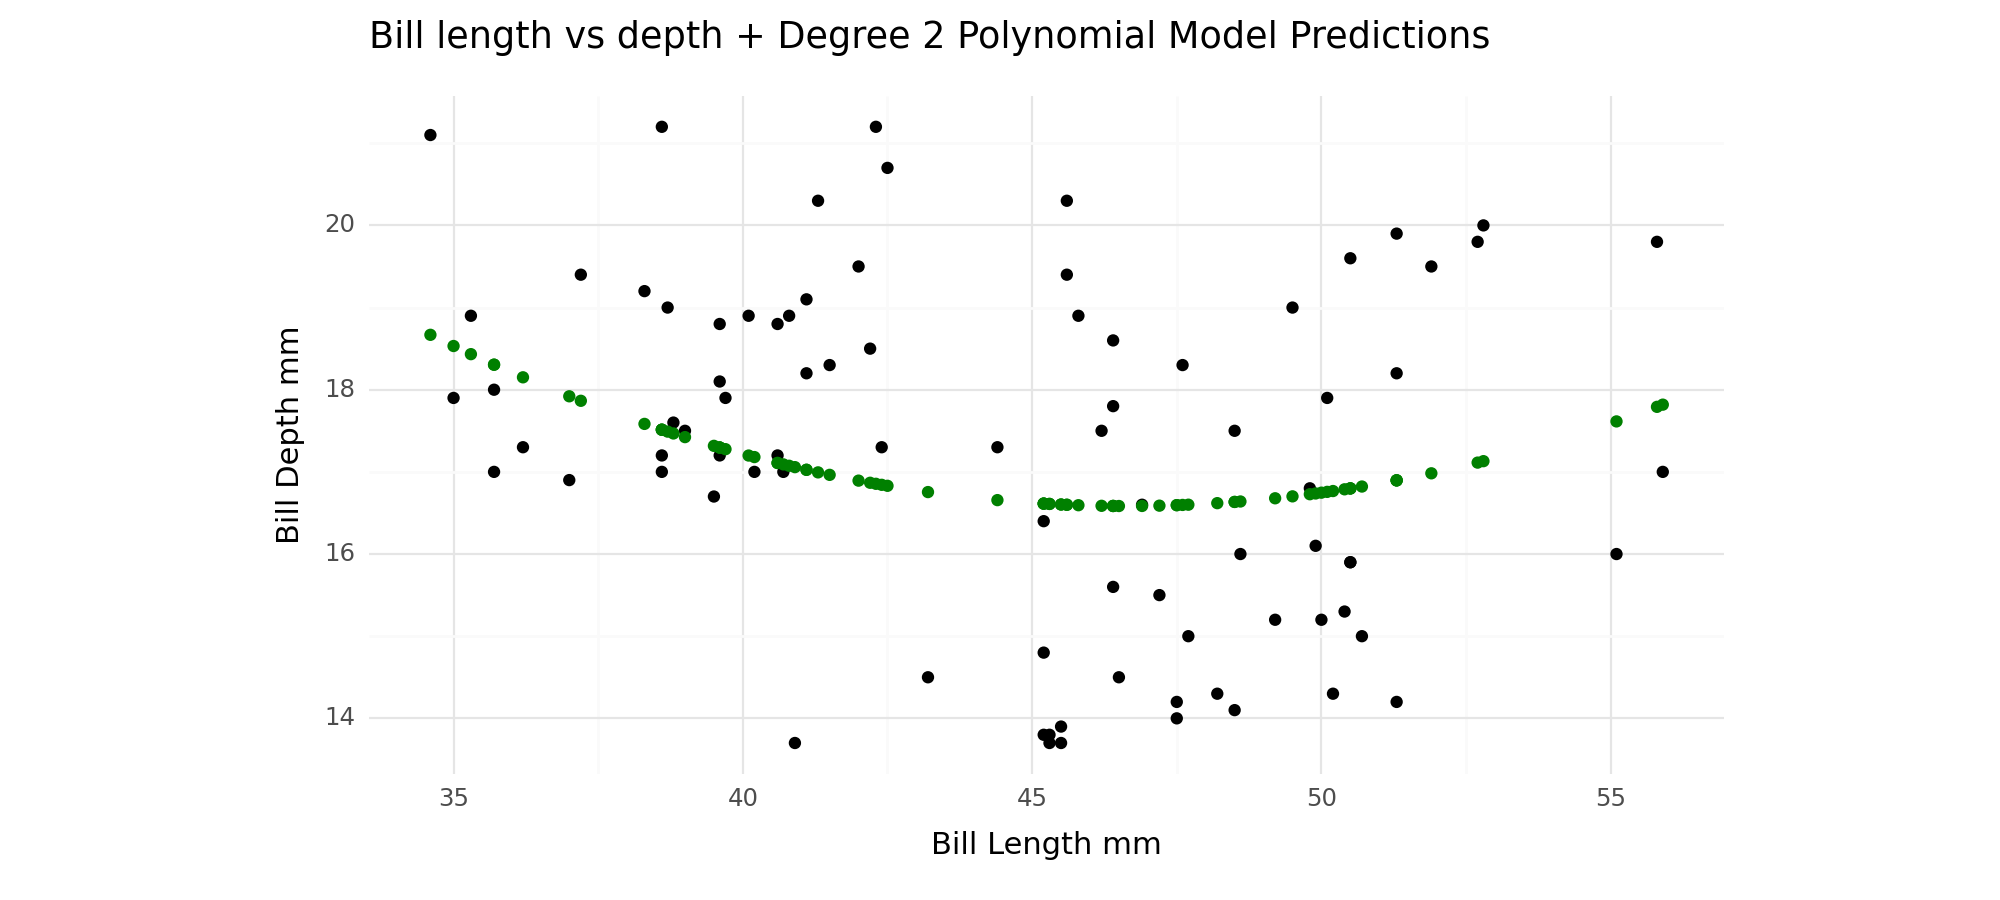

<Figure Size: (1000 x 450)>

In [121]:
# Create a quadratic (degree 2) polynomial MODEL

#renaming processess
poly = PolynomialFeatures(degree=2)
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
model_pipeline = Pipeline([
    ('polynomial_features', poly),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
model_pipeline.fit(X_train, y_train)

# Predicting with model
two_deg_lr = model_pipeline.predict(X_test)
#print(two_deg_lr)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'two_deg_lr': two_deg_lr})

# Plotting
(ggplot(test_data, aes(x="X_test"))
+ geom_point(test_data, aes(y='y_test'), color="black")
+ geom_point(test_data, aes(y='two_deg_lr'), color="green")
+ theme_minimal()
+ theme(aspect_ratio=.5, figure_size=(10, 4.5))
+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + Degree 2 Polynomial Model Predictions')
)

## Cubic (degree 3 polynomial) model

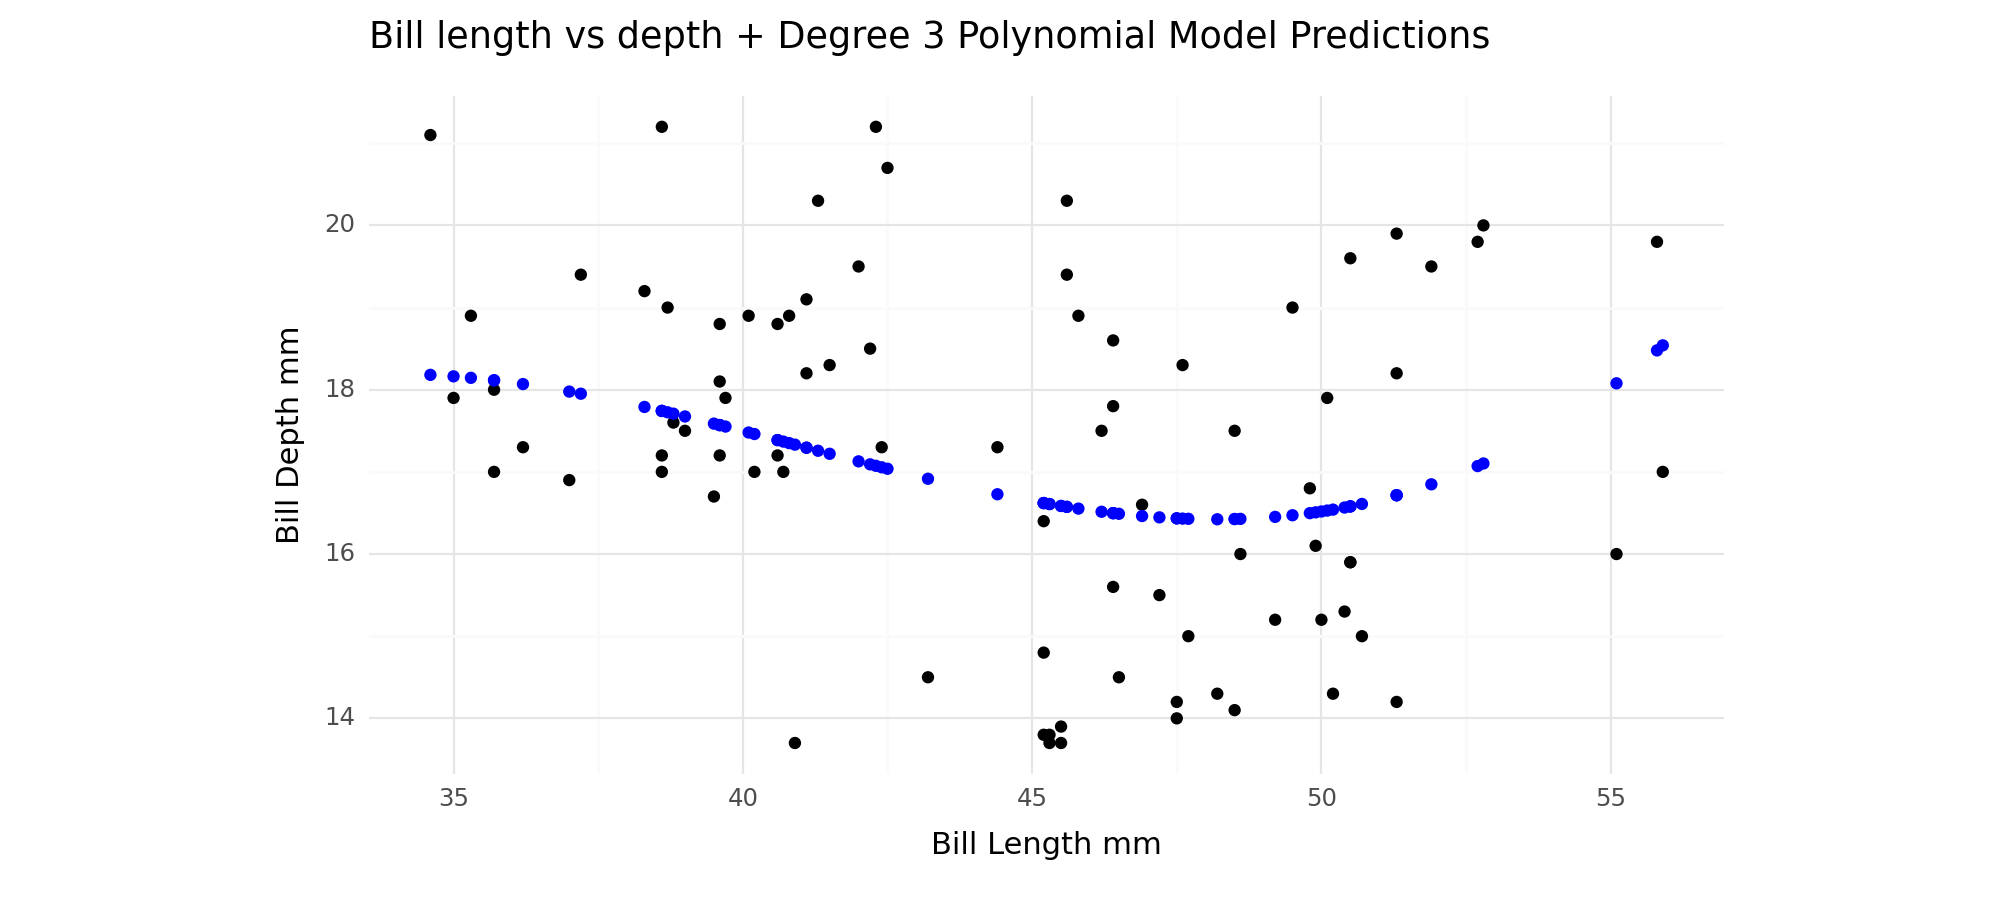

<Figure Size: (1000 x 450)>

In [122]:
# Create a quadratic (degree 3) polynomial MODEL

#renaming processess
poly = PolynomialFeatures(degree=3)
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
model_pipeline = Pipeline([
    ('polynomial_features', poly),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
model_pipeline.fit(X_train, y_train)

# Predictions with model
three_deg_lr = model_pipeline.predict(X_test)
#print(three_deg_lr)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'three_deg_lr': three_deg_lr})

# Plotting
(ggplot(test_data, aes(x="X_test"))
+ geom_point(test_data, aes(y='y_test'), color="black")
+ geom_point(test_data, aes(y='three_deg_lr'), color="blue")
+ theme_minimal()
+ theme(aspect_ratio=.5, figure_size=(10, 4.5))
+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + Degree 3 Polynomial Model Predictions')
)

## Degree 10 polynomial model

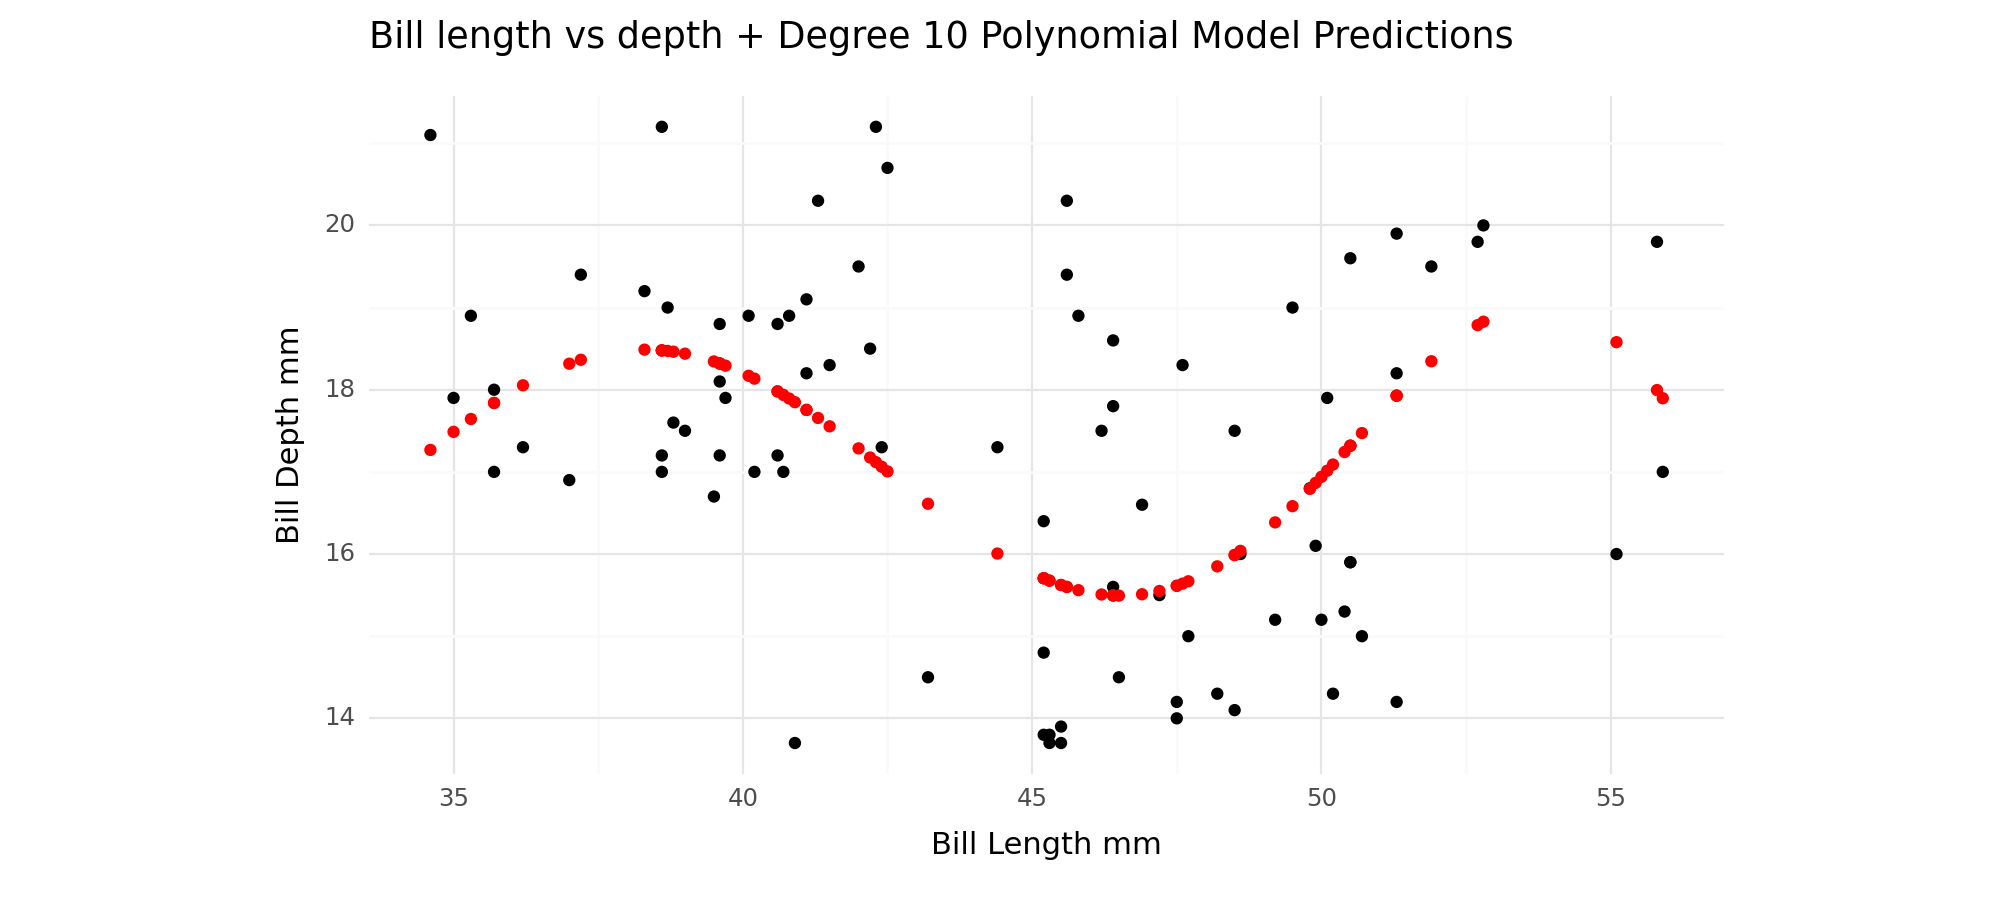

<Figure Size: (1000 x 450)>

In [123]:
# Create a quadratic (degree 10) polynomial MODEL

#renaming processess
poly = PolynomialFeatures(degree=10)
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
model_pipeline = Pipeline([
    ('polynomial_features', poly),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
model_pipeline.fit(X_train, y_train)

# Predictions with the 10 degree polynomial
ten_deg_lr = model_pipeline.predict(X_test)
#print(ten_deg_lr)

# creating dataframe for the plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'ten_deg_lr': ten_deg_lr})

# Plotting
(ggplot(test_data, aes(x="X_test"))
+ geom_point(test_data, aes(y='y_test'), color="black")
+ geom_point(test_data, aes(y='ten_deg_lr'), color="red")
+ theme_minimal() 
+ theme(aspect_ratio=.5, figure_size=(10, 4.5))
+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + Degree 10 Polynomial Model Predictions')
)

# Predictions for each model on one scatterplot.

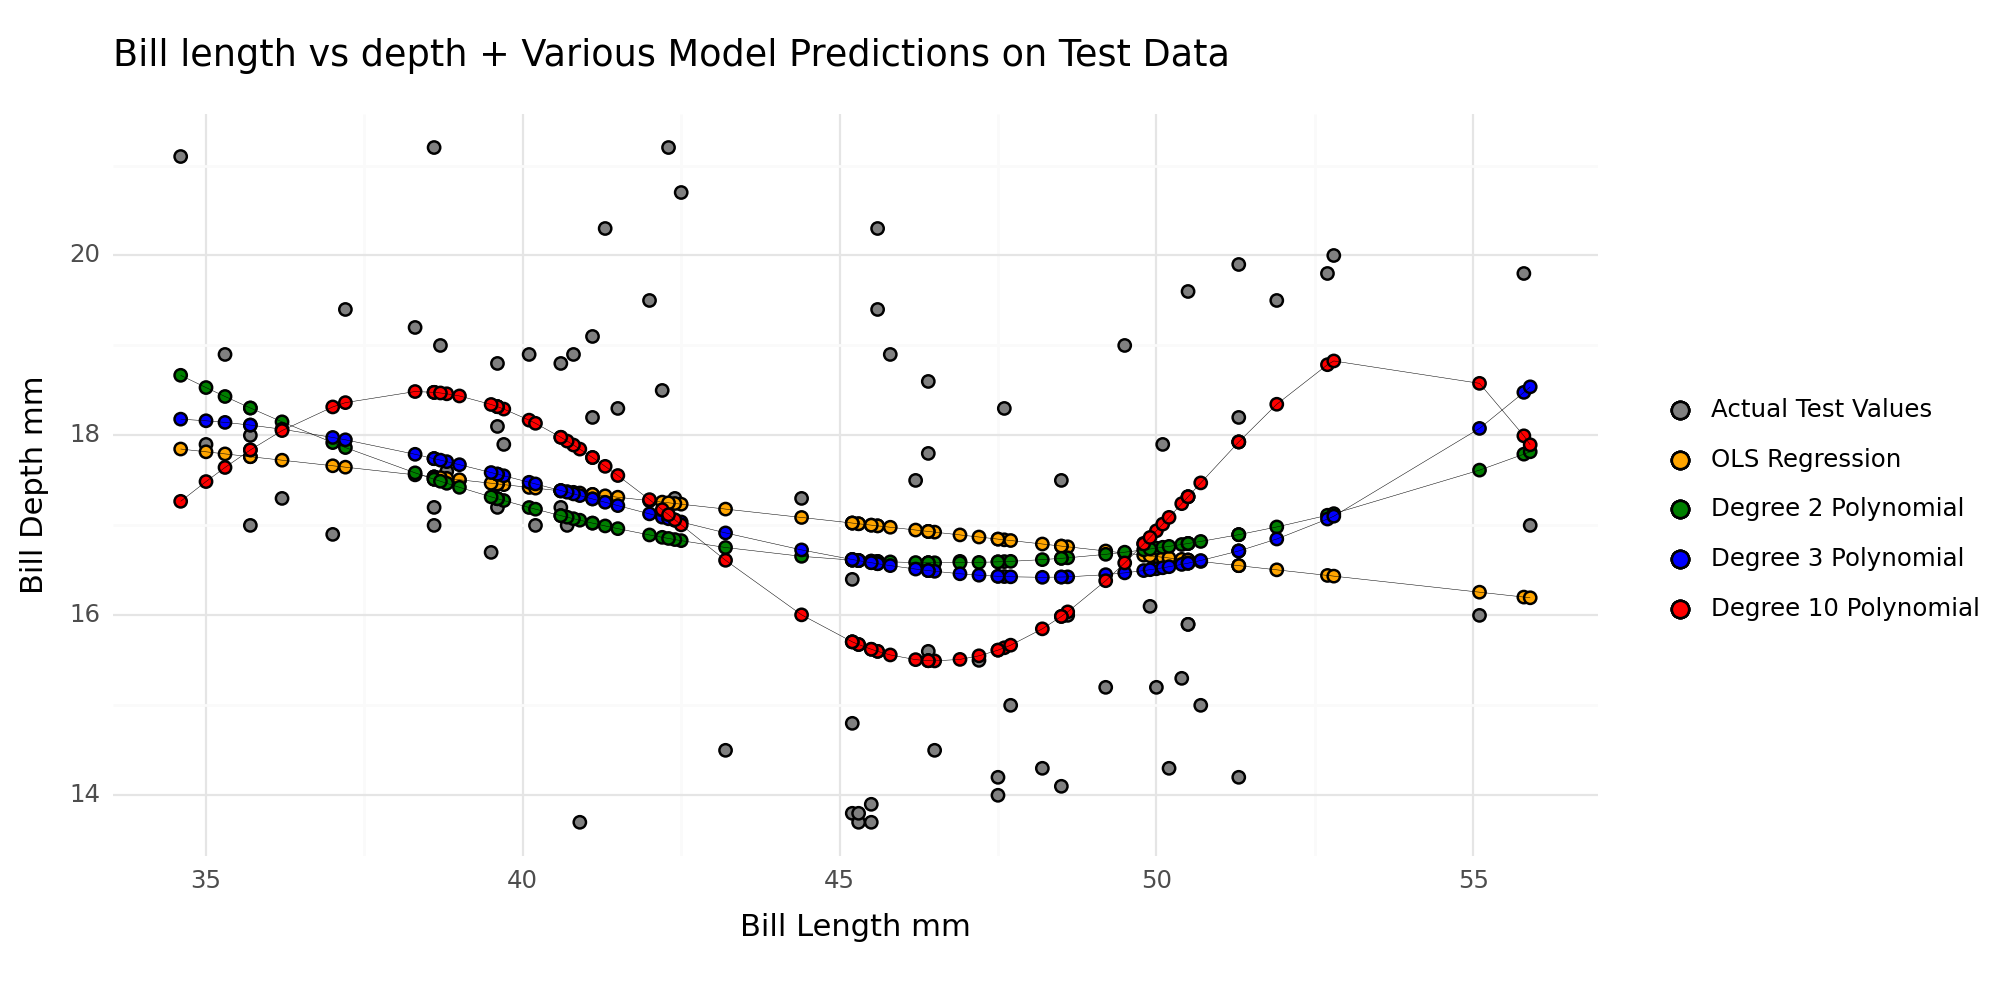

<Figure Size: (1000 x 500)>

In [124]:
#creating data frame for plotting
full = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test,
                     'ols_lr': ols_lr, 'two_deg_lr': two_deg_lr,
                     'three_deg_lr': three_deg_lr, 'ten_deg_lr': ten_deg_lr})

#plot with all the models' predictions and the actual values
(ggplot(full, aes(x="X_test"))

+ geom_point(aes(y='y_test', fill="'Actual Test Values'"), size=2)  #Actual 'y_test' data points

+ geom_point(aes(y='ols_lr', fill="'OLS Regression'"), size=2)  #'OLS Regression' data points
+ geom_line(aes(y='ols_lr', fill="'OLS Regression'"), size=.1)  # Line for 'OLS Regression'

+ geom_point(aes(y='two_deg_lr', fill="'Degree 2 Polynomial'"), size=2)  # 'Degree 2 Polynomial' data points
+ geom_line(aes(y='two_deg_lr', fill="'Degree 2 Polynomial'"), size=.1)  # Line for 'Degree 2 Polynomial'

+ geom_point(aes(y='three_deg_lr', fill="'Degree 3 Polynomial'"), size=2)  # 'Degree 3 Polynomial' data points
+ geom_line(aes(y='three_deg_lr', fill="'Degree 3 Polynomial'"), size=.1)  # Line for 'Degree 3 Polynomial'

+ geom_point(aes(y='ten_deg_lr', fill="'Degree 10 Polynomial'"), size=2)  # 'Degree 10 Polynomial' data points
+ geom_line(aes(y='ten_deg_lr', fill="'Degree 10 Polynomial'"), size=.1)  # Line for 'Degree 10 Polynomial'

+ theme_minimal()
+ theme(aspect_ratio=.5, figure_size=(10, 5))

+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + Various Model Predictions on Test Data')

+ scale_fill_manual(values={'Actual Test Values': 'gray', 'OLS Regression': 'orange', 'Degree 2 Polynomial': 'green', 'Degree 3 Polynomial': 'blue', 'Degree 10 Polynomial': 'red'})


+ guides(fill=guide_legend(title="", override_aes={"size": 3}))

)

# Conclusions

In [125]:
#Calculating the correlation between variables
correlation = penguins['bill_depth_mm'].corr(penguins['bill_length_mm'])

print(f'Correlation between bill_depth_mm and bill_length_mm: {correlation}')

Correlation between bill_depth_mm and bill_length_mm: -0.22862563591302915


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

When we are talking purely about predictions as you increase in degrees, the better the fitting gets in terms of the test data.

I can see how increasing the degrees could start to overfit the data here such as with polynomial 10, it gets really good at fitting the specific points.

OLS is not the best model here becasue the variables have such a low linear correlation, as you move up in the degrees the models seem to do a better job at fitting the points with a line that on average minimizes the residuals. We would need other model selection techniques to pick the best  model as simply plotting against doesn't tell the full story of how the model is performing.